In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#패키지 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
df.head(10)

,가뭄(MSWSI),가뭄(SPI6),평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,,,
2013-01-05,0.0,0.0,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,-0.5,0.0,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,0.0,0.0,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,0.0,0.0,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,0.5,0.0,43.671429,0.718286,2.076014,-0.828571,-0.222714
2013-02-09,0.0,1.0,44.371429,0.610286,1.276543,-5.642857,0.115857
2013-02-16,0.0,0.0,43.857143,0.622429,0.000000,-4.628571,-0.216714
2013-02-23,-0.5,0.0,42.514286,0.642571,0.066843,-3.414286,-0.320857
2013-03-02,-0.5,0.0,41.028571,0.655429,0.142857,0.828571,-0.198429


In [ ]:
#데이터 분리
target=['가뭄(MSWSI)','가뭄(SPI6)']
X=df.drop(target,axis=1)
y=df[target]
display(X)
display(y)

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2013-01-05,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...
2024-11-30,68.400000,0.358571,1.304057,0.885714,-0.131571
2024-12-07,67.742857,0.373571,0.000000,0.942857,-0.177857
2024-12-14,66.757143,0.388429,0.000000,-2.257143,-0.230429


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


In [ ]:
y[target] = y[target].replace({ 2: '극한습윤', 1.5: '심한습윤', 1: '보통습윤', 0.5: '약한습윤',0: '정상', -0.5: '약한가뭄', -1: '보통가뭄', -1.5: '심한가뭄', -2: '극한가뭄'})
y[target] = y[target].astype('category')
display(y[target])
y.info()

/tmp/ipython-input-176971093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target] = y[target].replace({ 2: '극한습윤', 1.5: '심한습윤', 1: '보통습윤', 0.5: '약한습윤',0: '정상', -0.5: '약한가뭄', -1: '보통가뭄', -1.5: '심한가뭄', -2: '극한가뭄'})
/tmp/ipython-input-176971093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target] = y[target].astype('category')


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,정상,정상
2013-01-12,약한가뭄,정상
2013-01-19,정상,정상
2013-01-26,정상,정상
2013-02-02,약한습윤,정상
...,...,...
2024-11-30,약한습윤,정상
2024-12-07,정상,정상
2024-12-14,약한가뭄,정상


<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   가뭄(MSWSI)  626 non-null    category
 1   가뭄(SPI6)   626 non-null    category
dtypes: category(2)
memory usage: 6.7+ KB


In [ ]:
#train, test 데이터 나누기
test_size = 52#24년 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할

In [ ]:
display(X_train.tail(5))
display(y_train.tail(5))
display(X_test.head(5))
display(y_test.head(5))

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,63.257143,0.381286,0.352557,-1.728571,-0.291000
2023-12-09,61.942857,0.381571,0.847971,2.757143,-0.257857
2023-12-16,70.014286,0.372143,19.862429,1.700000,2.564429
2023-12-23,65.414286,0.397714,0.000000,-10.214286,-2.223857
2023-12-30,63.257143,0.411429,0.285714,-3.371429,0.061000


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2023-12-02,약한가뭄,정상
2023-12-09,정상,정상
2023-12-16,극한습윤,보통습윤
2023-12-23,심한습윤,보통습윤
2023-12-30,약한습윤,보통습윤


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,63.128571,0.401714,1.267371,-0.700000,0.038000
2024-01-13,62.571429,0.400429,0.000000,-3.842857,-0.048429
2024-01-20,61.828571,0.392143,5.513757,-1.100000,-0.154286
2024-01-27,61.000000,0.405857,0.142857,-8.471429,-0.118571
2024-02-03,60.042857,0.423429,0.276543,-3.000000,-0.167286


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,정상,보통습윤
2024-01-13,정상,정상
2024-01-20,약한습윤,정상
2024-01-27,정상,정상
2024-02-03,약한가뭄,정상


In [ ]:
from sklearn.preprocessing import RobustScaler
#스케일러 적용
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)#test는 fit하지 않습니다(데이터누수 때문에)

#dataframe으로 변환
X_train_robust   = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust    = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

In [ ]:
#스케일러 적용확인
display(X_train_robust.tail(5))
display(X_test_robust.head(5))


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,-0.863659,0.140671,-0.196367,-0.702542,-0.511178
2023-12-09,-1.050177,0.143586,-0.064407,-0.436441,-0.411436
2023-12-16,0.095286,0.047376,5.000342,-0.499153,8.082115
2023-12-23,-0.557527,0.308309,-0.290275,-1.205932,-6.328031
2023-12-30,-0.863659,0.448251,-0.214171,-0.800000,0.548151


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,-0.881906,0.349125,0.047306,-0.641525,0.478934
2024-01-13,-0.960973,0.336006,-0.290275,-0.827966,0.218831
2024-01-20,-1.066396,0.251458,1.178386,-0.665254,-0.099742
2024-01-27,-1.183984,0.391399,-0.252223,-1.102542,0.007739
2024-02-03,-1.319818,0.570700,-0.216614,-0.777966,-0.138865


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
y_train_ohe  = ohe.fit_transform(y_train[['가뭄(MSWSI)', '가뭄(SPI6)']])
y_test_ohe  = ohe.transform(y_test[['가뭄(MSWSI)', '가뭄(SPI6)']])#test는 fit하지 않습니다(데이터누수 때문에)
encoded_y_train = pd.DataFrame(y_train_ohe, columns=ohe.get_feature_names_out(), index=y_train.index)
encoded_y_test = pd.DataFrame(y_test_ohe, columns=ohe.get_feature_names_out(), index=y_test.index)
display(encoded_y_train)
display(encoded_y_test)

,가뭄(MSWSI)_극한습윤,가뭄(MSWSI)_보통가뭄,가뭄(MSWSI)_보통습윤,가뭄(MSWSI)_심한가뭄,가뭄(MSWSI)_심한습윤,가뭄(MSWSI)_약한가뭄,가뭄(MSWSI)_약한습윤,가뭄(MSWSI)_정상,가뭄(SPI6)_극한가뭄,가뭄(SPI6)_보통가뭄,가뭄(SPI6)_보통습윤,가뭄(SPI6)_심한가뭄,가뭄(SPI6)_심한습윤,가뭄(SPI6)_정상
관측일시,,,,,,,,,,,,,,
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-02-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-12-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-12-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,가뭄(MSWSI)_극한습윤,가뭄(MSWSI)_보통가뭄,가뭄(MSWSI)_보통습윤,가뭄(MSWSI)_심한가뭄,가뭄(MSWSI)_심한습윤,가뭄(MSWSI)_약한가뭄,가뭄(MSWSI)_약한습윤,가뭄(MSWSI)_정상,가뭄(SPI6)_극한가뭄,가뭄(SPI6)_보통가뭄,가뭄(SPI6)_보통습윤,가뭄(SPI6)_심한가뭄,가뭄(SPI6)_심한습윤,가뭄(SPI6)_정상
관측일시,,,,,,,,,,,,,,
2024-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2024-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-01-20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2024-03-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 변수설명
X_train=독립변수 훈련데이터\
X_test=독립변수 테스트데이터\
y_test=종속변수 테스트데이터(원핫인코딩x)\
y_train=종속변수 훈련데이터(원핫인코딩x)\
encoded_y_train=종속변수 테스트데이터(원핫인코딩o)\
encoded_y_test=종속변수 테스트데이터(원핫인코딩o)\
=================================================\
훈련데이터는 X_train_robust,encoded_y_train 사용\
테스트 데이터는 X_test_robust,encoded_y_test 사용


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# KNN 모델 구현 (n_neighbor = 5, RobustScaler 적용)
knn_model_mswsi_robust_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_spi6_robust_5 = KNeighborsClassifier(n_neighbors=5)

# 모델 훈련
knn_model_mswsi_robust_5.fit(X_train_robust, y_train['가뭄(MSWSI)'])
knn_model_spi6_robust_5.fit(X_train_robust, y_train['가뭄(SPI6)'])

# 예측
y_pred_mswsi_robust_5 = knn_model_mswsi_robust_5.predict(X_test_robust)
y_pred_spi6_robust_5 = knn_model_spi6_robust_5.predict(X_test_robust)

# 모델 평가
print("가뭄(MSWSI) KNN 모델 (n_neighbors=5, RobustScaler 적용) 평가:")
print("정확도:", accuracy_score(y_test['가뭄(MSWSI)'], y_pred_mswsi_robust_5))
print("분류 보고서:")
print(classification_report(y_test['가뭄(MSWSI)'], y_pred_mswsi_robust_5))

print("\n가뭄(SPI6) KNN 모델 (n_neighbors=5, RobustScaler 적용) 평가:")
print("정확도:", accuracy_score(y_test['가뭄(SPI6)'], y_pred_spi6_robust_5))
print("분류 보고서:")
print(classification_report(y_test['가뭄(SPI6)'], y_pred_spi6_robust_5))

# KNN 모델 구현 (n_neighbor = 100, RobustScaler 적용)
knn_model_mswsi_robust_100 = KNeighborsClassifier(n_neighbors=100)
knn_model_spi6_robust_100 = KNeighborsClassifier(n_neighbors=100)

# 모델 훈련
knn_model_mswsi_robust_100.fit(X_train_robust, y_train['가뭄(MSWSI)'])
knn_model_spi6_robust_100.fit(X_train_robust, y_train['가뭄(SPI6)'])

# 예측
y_pred_mswsi_robust_100 = knn_model_mswsi_robust_100.predict(X_test_robust)
y_pred_spi6_robust_100 = knn_model_spi6_robust_100.predict(X_test_robust)

# 모델 평가
print("가뭄(MSWSI) KNN 모델 (n_neighbors=100, RobustScaler 적용) 평가:")
print("정확도:", accuracy_score(y_test['가뭄(MSWSI)'], y_pred_mswsi_robust_100))
print("분류 보고서:")
print(classification_report(y_test['가뭄(MSWSI)'], y_pred_mswsi_robust_100))

print("\n가뭄(SPI6) KNN 모델 (n_neighbors=100, RobustScaler 적용) 평가:")
print("정확도:", accuracy_score(y_test['가뭄(SPI6)'], y_pred_spi6_robust_100))
print("분류 보고서:")
print(classification_report(y_test['가뭄(SPI6)'], y_pred_spi6_robust_100))

가뭄(MSWSI) KNN 모델 (n_neighbors=5, RobustScaler 적용) 평가:
정확도: 0.2692307692307692
분류 보고서:
              precision    recall  f1-score   support

        극한습윤       0.00      0.00      0.00         2
        보통가뭄       0.17      0.29      0.21         7
        보통습윤       0.00      0.00      0.00         4
        심한가뭄       0.00      0.00      0.00         1
        심한습윤       0.00      0.00      0.00         2
        약한가뭄       0.33      0.41      0.37        17
        약한습윤       0.50      0.29      0.36         7
          정상       0.23      0.25      0.24        12

    accuracy                           0.27        52
   macro avg       0.15      0.15      0.15        52
weighted avg       0.25      0.27      0.25        52


가뭄(SPI6) KNN 모델 (n_neighbors=5, RobustScaler 적용) 평가:
정확도: 0.6923076923076923
분류 보고서:
              precision    recall  f1-score   support

        보통가뭄       0.00      0.00      0.00         0
        보통습윤       1.00      0.08      0.14        13
        심한습윤  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

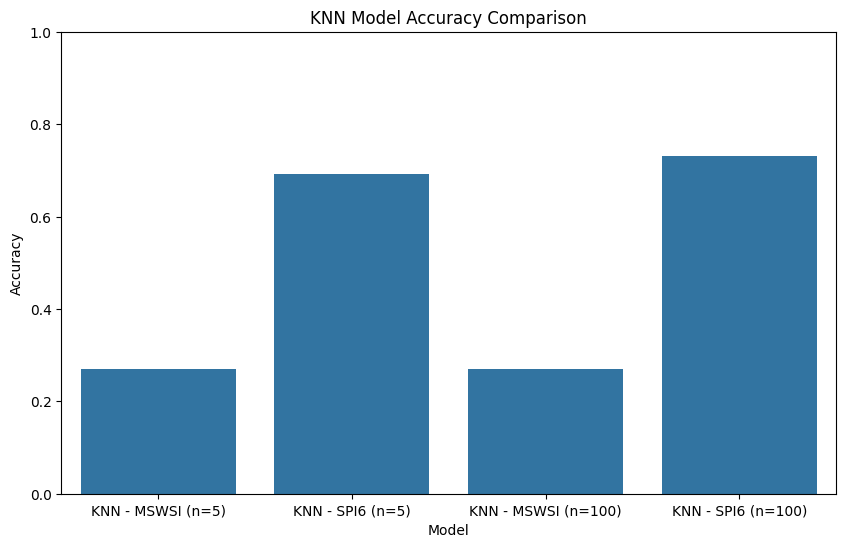

In [ ]:
# KNN model 정확도(accuracy) 시각화
knn_accuracy_data = {
    'Model': ['KNN - MSWSI (n=5)', 'KNN - SPI6 (n=5)', 'KNN - MSWSI (n=100)', 'KNN - SPI6 (n=100)'],
    'Accuracy': [accuracy_score(y_test['가뭄(MSWSI)'], y_pred_mswsi_robust_5),
                 accuracy_score(y_test['가뭄(SPI6)'], y_pred_spi6_robust_5),
                 accuracy_score(y_test['가뭄(MSWSI)'], y_pred_mswsi_robust_100),
                 accuracy_score(y_test['가뭄(SPI6)'], y_pred_spi6_robust_100)]
}

knn_accuracy_df = pd.DataFrame(knn_accuracy_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=knn_accuracy_df)
plt.title('KNN Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.show()

KNN 모델은 학습 그래프를 제공하지 않습니다. 시계열 예측 시각화의 경우, 현재 KNN 모델은 분류를 위해 구현되어 있어 시계열 예측 시각화에 바로 적용하기는 어렵습니다.

# CNN 모델

## 기본 모델

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape data for CNN
X_train_cnn = X_train_robust.values.reshape(X_train_robust.shape[0], X_train_robust.shape[1], 1)
X_test_cnn = X_test_robust.values.reshape(X_test_robust.shape[0], X_test_robust.shape[1], 1)

# CNN Model for 가뭄(MSWSI)
model_mswsi_cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(encoded_y_train.filter(like='가뭄(MSWSI)').shape[1], activation='softmax')
])

model_mswsi_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# CNN Model for 가뭄(SPI6)
model_spi6_cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(encoded_y_train.filter(like='가뭄(SPI6)').shape[1], activation='softmax')
])

model_spi6_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train CNN Model for 가뭄(MSWSI)
print("Training CNN model for 가뭄(MSWSI)...")
history_mswsi_cnn = model_mswsi_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(MSWSI)'), epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(MSWSI)
loss_mswsi_cnn, accuracy_mswsi_cnn = model_mswsi_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(MSWSI)'), verbose=0)
print(f"가뭄(MSWSI) CNN 모델 정확도: {accuracy_mswsi_cnn:.4f}")

# Train CNN Model for 가뭄(SPI6)
print("\nTraining CNN model for 가뭄(SPI6)...")
history_spi6_cnn = model_spi6_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(SPI6)'), epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(SPI6)
loss_spi6_cnn, accuracy_spi6_cnn = model_spi6_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(SPI6)'), verbose=0)
print(f"가뭄(SPI6) CNN 모델 정확도: {accuracy_spi6_cnn:.4f}")

Training CNN model for 가뭄(MSWSI)...
가뭄(MSWSI) CNN 모델 정확도: 0.3269

Training CNN model for 가뭄(SPI6)...
가뭄(SPI6) CNN 모델 정확도: 0.7115


In [ ]:
from sklearn.metrics import classification_report

# Get the class names without the prefix
mswsi_classes = [col.replace('가뭄(MSWSI)_', '') for col in encoded_y_test.filter(like='가뭄(MSWSI)').columns]
spi6_classes = [col.replace('가뭄(SPI6)_', '') for col in encoded_y_test.filter(like='가뭄(SPI6)').columns]


# Predict on the test set for MSWSI model
y_pred_prob_mswsi = model_mswsi_cnn.predict(X_test_cnn)
y_pred_mswsi_encoded = encoded_y_test.filter(like='가뭄(MSWSI)').columns[y_pred_prob_mswsi.argmax(axis=1)]
y_pred_mswsi = [label.replace('가뭄(MSWSI)_', '') for label in y_pred_mswsi_encoded]

# Evaluate MSWSI model
print("가뭄(MSWSI) CNN 모델 성능 평가:")
print(classification_report(y_test['가뭄(MSWSI)'], y_pred_mswsi, labels=mswsi_classes, zero_division=0))


# Predict on the test set for SPI6 model
y_pred_prob_spi6 = model_spi6_cnn.predict(X_test_cnn)
y_pred_spi6_encoded = encoded_y_test.filter(like='가뭄(SPI6)').columns[y_pred_prob_spi6.argmax(axis=1)]
y_pred_spi6 = [label.replace('가뭄(SPI6)_', '') for label in y_pred_spi6_encoded]


# Evaluate SPI6 model
print("\n가뭄(SPI6) CNN 모델 성능 평가:")
print(classification_report(y_test['가뭄(SPI6)'], y_pred_spi6, labels=spi6_classes, zero_division=0))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
가뭄(MSWSI) CNN 모델 성능 평가:
              precision    recall  f1-score   support

        극한습윤       0.00      0.00      0.00         2
        보통가뭄       0.25      0.14      0.18         7
        보통습윤       0.00      0.00      0.00         4
        심한가뭄       0.00      0.00      0.00         1
        심한습윤       0.00      0.00      0.00         2
        약한가뭄       0.50      0.53      0.51        17
        약한습윤       0.00      0.00      0.00         7
          정상       0.23      0.58      0.33        12

    accuracy                           0.33        52
   macro avg       0.12      0.16      0.13        52
weighted avg       0.25      0.33      0.27        52

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

가뭄(SPI6) CNN 모델 성능 평가:
              precision    recall  f1-score   support

        극한가뭄       0.00      0.00      0.00         0
        보통가뭄       0.00      0.00      0.00         0
        보통습윤       0.00      0.00      0.00        13
        

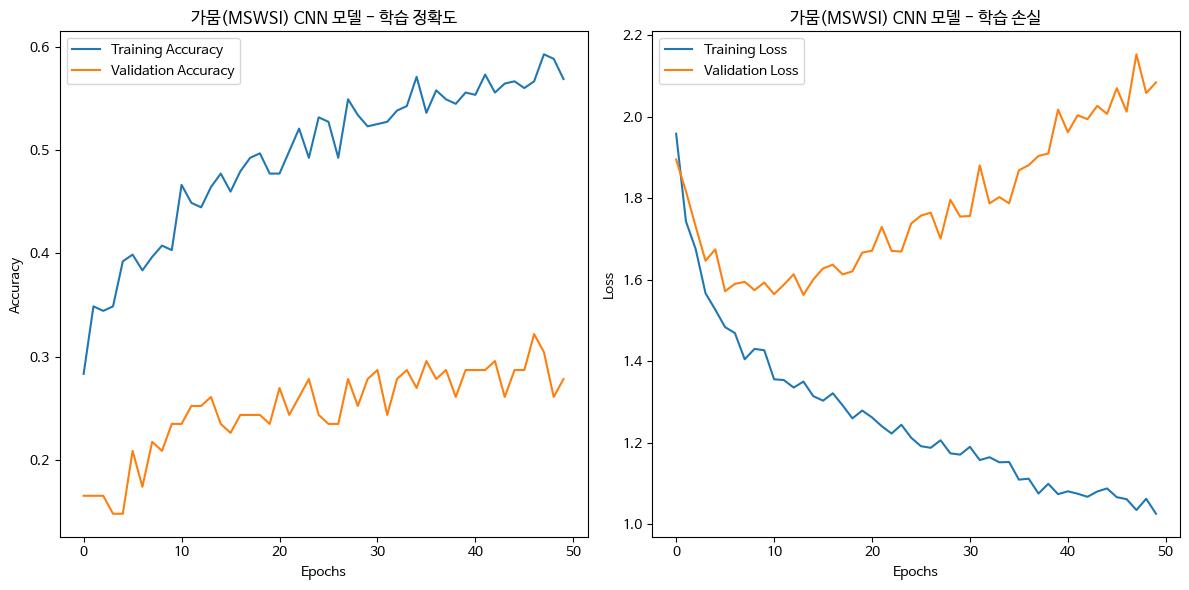

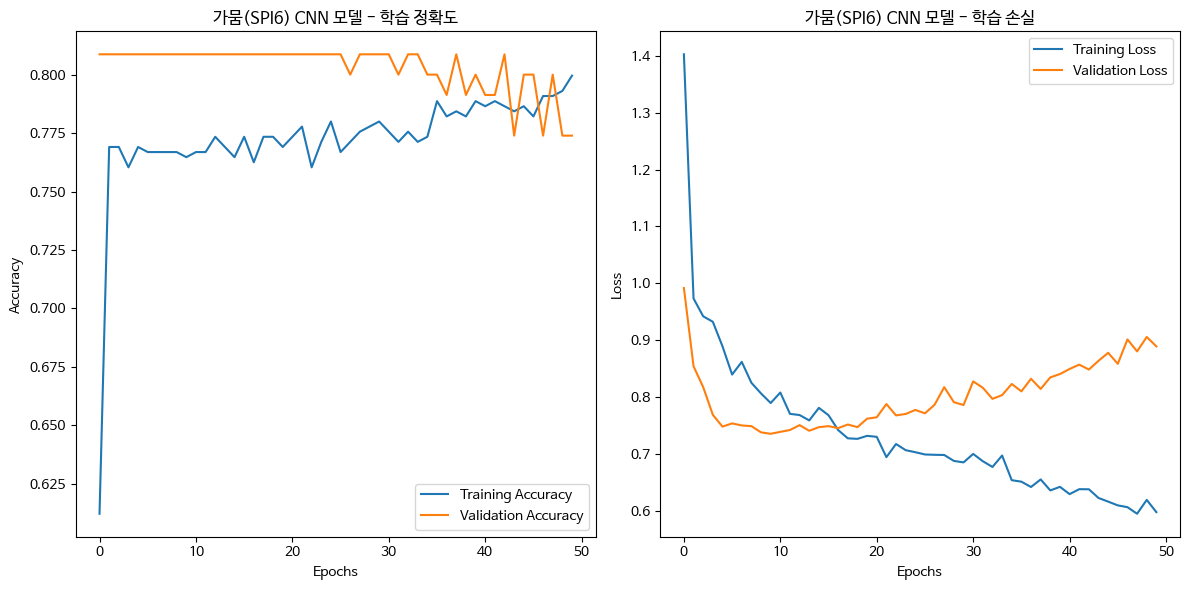

In [ ]:
# Plot training history for 가뭄(MSWSI) CNN model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_mswsi_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_mswsi_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('가뭄(MSWSI) CNN 모델 - 학습 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mswsi_cnn.history['loss'], label='Training Loss')
plt.plot(history_mswsi_cnn.history['val_loss'], label='Validation Loss')
plt.title('가뭄(MSWSI) CNN 모델 - 학습 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training history for 가뭄(SPI6) CNN model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_spi6_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_spi6_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('가뭄(SPI6) CNN 모델 - 학습 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_spi6_cnn.history['loss'], label='Training Loss')
plt.plot(history_spi6_cnn.history['val_loss'], label='Validation Loss')
plt.title('가뭄(SPI6) CNN 모델 - 학습 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# performance evaluation table for CNN

In [ ]:
# performance evaluation table for CNN
performance_data = {
    'Model': ['CNN - MSWSI', 'CNN - SPI6'],
    'Accuracy': [accuracy_mswsi_cnn, accuracy_spi6_cnn],
    'Loss': [loss_mswsi_cnn, loss_spi6_cnn]
}

performance_df = pd.DataFrame(performance_data)

print("CNN Model Performance Evaluation:")
display(performance_df)

CNN Model Performance Evaluation:


,Model,Accuracy,Loss
0,CNN - MSWSI,0.326923,2.591071
1,CNN - SPI6,0.711538,1.815404


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


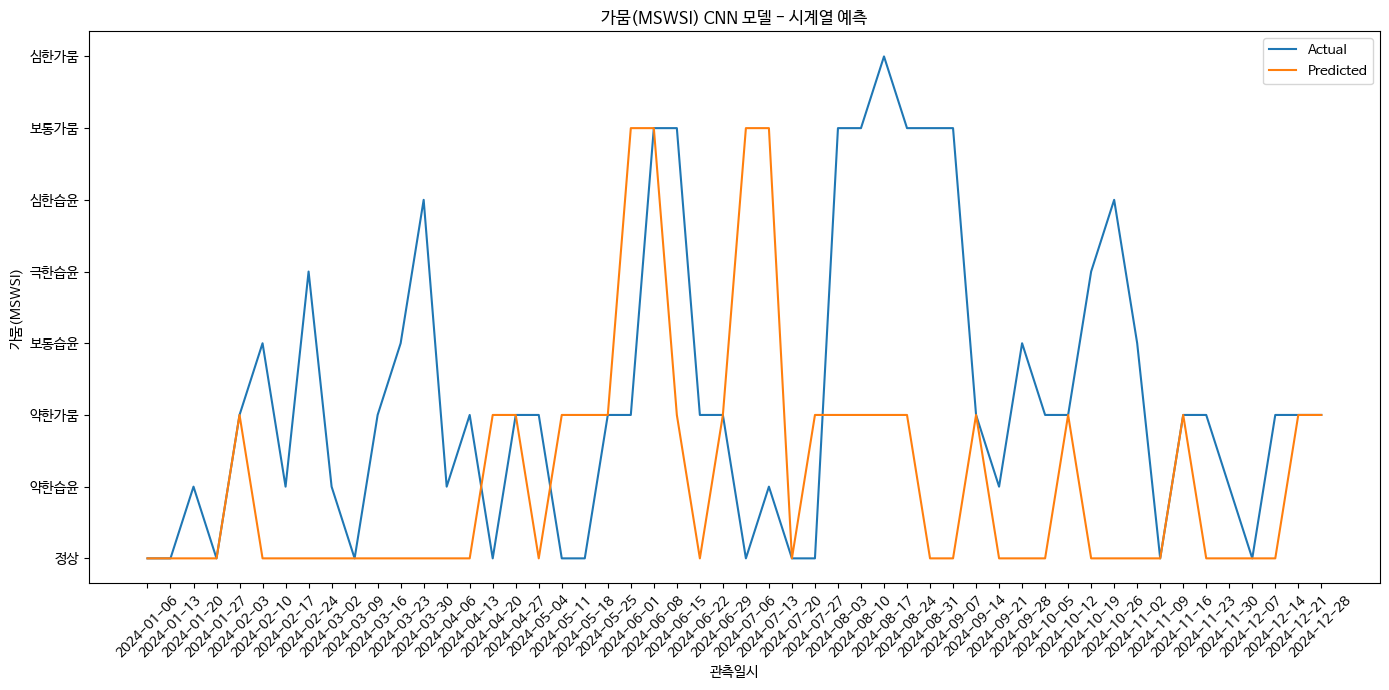

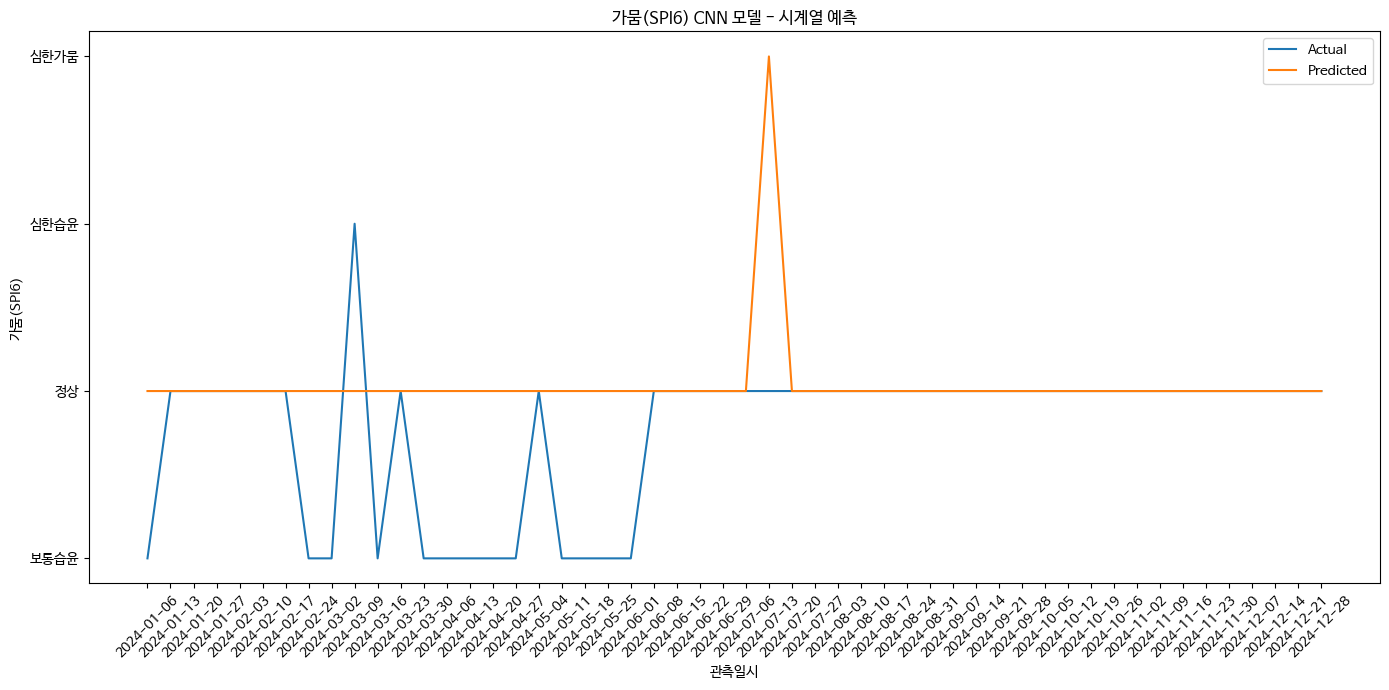

In [ ]:
# Prepare data for time series visualization
# Get the predicted class labels from the one-hot encoded predictions
y_pred_prob_mswsi = model_mswsi_cnn.predict(X_test_cnn)
y_pred_mswsi_cnn_encoded = encoded_y_test.filter(like='가뭄(MSWSI)').columns[y_pred_prob_mswsi.argmax(axis=1)]
y_pred_mswsi_cnn_labels = [label.replace('가뭄(MSWSI)_', '') for label in y_pred_mswsi_cnn_encoded]


y_pred_prob_spi6 = model_spi6_cnn.predict(X_test_cnn)
y_pred_spi6_cnn_encoded = encoded_y_test.filter(like='가뭄(SPI6)').columns[y_pred_prob_spi6.argmax(axis=1)]
y_pred_spi6_cnn_labels = [label.replace('가뭄(SPI6)_', '') for label in y_pred_spi6_cnn_encoded]

# Create DataFrames for actual and predicted values with the correct index
y_test_mswsi_df = y_test['가뭄(MSWSI)'].to_frame()
y_test_spi6_df = y_test['가뭄(SPI6)'].to_frame()

y_pred_mswsi_cnn_df = pd.DataFrame(y_pred_mswsi_cnn_labels, index=y_test.index, columns=['가뭄(MSWSI)'])
y_pred_spi6_cnn_df = pd.DataFrame(y_pred_spi6_cnn_labels, index=y_test.index, columns=['가뭄(SPI6)'])

# Concatenate actual and predicted values for plotting
mswsi_plot_df = pd.concat([y_test_mswsi_df, y_pred_mswsi_cnn_df], axis=1)
mswsi_plot_df.columns = ['Actual', 'Predicted']

spi6_plot_df = pd.concat([y_test_spi6_df, y_pred_spi6_cnn_df], axis=1)
spi6_plot_df.columns = ['Actual', 'Predicted']

# Sort by index (date) to ensure correct time series plotting
mswsi_plot_df = mswsi_plot_df.sort_index()
spi6_plot_df = spi6_plot_df.sort_index()

# Visualize time series predictions for 가뭄(MSWSI)
plt.figure(figsize=(14, 7))
plt.plot(mswsi_plot_df.index, mswsi_plot_df['Actual'], label='Actual')
plt.plot(mswsi_plot_df.index, mswsi_plot_df['Predicted'], label='Predicted')
plt.title('가뭄(MSWSI) CNN 모델 - 시계열 예측')
plt.xlabel('관측일시')
plt.ylabel('가뭄(MSWSI)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize time series predictions for 가뭄(SPI6)
plt.figure(figsize=(14, 7))
plt.plot(spi6_plot_df.index, spi6_plot_df['Actual'], label='Actual')
plt.plot(spi6_plot_df.index, spi6_plot_df['Predicted'], label='Predicted')
plt.title('가뭄(SPI6) CNN 모델 - 시계열 예측')
plt.xlabel('관측일시')
plt.ylabel('가뭄(SPI6)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 훈련 변경 모델 1 (batch size 32 => 64로 변경)

In [ ]:
# Train CNN Model for 가뭄(MSWSI)
print("Training CNN model for 가뭄(MSWSI)...")
history_mswsi_cnn = model_mswsi_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(MSWSI)'), epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(MSWSI)
loss_mswsi_cnn, accuracy_mswsi_cnn = model_mswsi_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(MSWSI)'), verbose=0)
print(f"가뭄(MSWSI) CNN 모델 정확도: {accuracy_mswsi_cnn:.4f}")

# Train CNN Model for 가뭄(SPI6)
print("\nTraining CNN model for 가뭄(SPI6)...")
history_spi6_cnn = model_spi6_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(SPI6)'), epochs=50, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(SPI6)
loss_spi6_cnn, accuracy_spi6_cnn = model_spi6_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(SPI6)'), verbose=0)
print(f"가뭄(SPI6) CNN 모델 정확도: {accuracy_spi6_cnn:.4f}")


# 훈련 변경 모델 2 (batch size 32 => 64로 변경 및 epoch 50 => 100으로 변경)
```
# 코드로 형식 지정됨
```



In [ ]:
# Train CNN Model for 가뭄(MSWSI)
print("Training CNN model for 가뭄(MSWSI)...")
history_mswsi_cnn = model_mswsi_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(MSWSI)'), epochs=100, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(MSWSI)
loss_mswsi_cnn, accuracy_mswsi_cnn = model_mswsi_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(MSWSI)'), verbose=0)
print(f"가뭄(MSWSI) CNN 모델 정확도: {accuracy_mswsi_cnn:.4f}")

# Train CNN Model for 가뭄(SPI6)
print("\nTraining CNN model for 가뭄(SPI6)...")
history_spi6_cnn = model_spi6_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(SPI6)'), epochs=100, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(SPI6)
loss_spi6_cnn, accuracy_spi6_cnn = model_spi6_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(SPI6)'), verbose=0)
print(f"가뭄(SPI6) CNN 모델 정확도: {accuracy_spi6_cnn:.4f}")

# 훈련 변경 모델 3 (batch size 32 유지 및 epoch 50 => 100으로 변경)

In [ ]:
# Train CNN Model for 가뭄(MSWSI)
print("Training CNN model for 가뭄(MSWSI)...")
history_mswsi_cnn = model_mswsi_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(MSWSI)'), epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(MSWSI)
loss_mswsi_cnn, accuracy_mswsi_cnn = model_mswsi_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(MSWSI)'), verbose=0)
print(f"가뭄(MSWSI) CNN 모델 정확도: {accuracy_mswsi_cnn:.4f}")

# Train CNN Model for 가뭄(SPI6)
print("\nTraining CNN model for 가뭄(SPI6)...")
history_spi6_cnn = model_spi6_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(SPI6)'), epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(SPI6)
loss_spi6_cnn, accuracy_spi6_cnn = model_spi6_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(SPI6)'), verbose=0)
print(f"가뭄(SPI6) CNN 모델 정확도: {accuracy_spi6_cnn:.4f}")

# 모델 파라미터 변경

# 활성화함수 변경(ReLU => tanh)

In [ ]:
# Reshape data for CNN
X_train_cnn = X_train_robust.values.reshape(X_train_robust.shape[0], X_train_robust.shape[1], 1)
X_test_cnn = X_test_robust.values.reshape(X_test_robust.shape[0], X_test_robust.shape[1], 1)

# CNN Model for 가뭄(MSWSI)
model_mswsi_cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='tanh', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='tanh', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(encoded_y_train.filter(like='가뭄(MSWSI)').shape[1], activation='softmax')
])

model_mswsi_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# CNN Model for 가뭄(SPI6)
model_spi6_cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='tanh', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='tanh', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(encoded_y_train.filter(like='가뭄(SPI6)').shape[1], activation='softmax')
])

model_spi6_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train CNN Model for 가뭄(MSWSI)
print("Training CNN model for 가뭄(MSWSI)...")
history_mswsi_cnn = model_mswsi_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(MSWSI)'), epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(MSWSI)
loss_mswsi_cnn, accuracy_mswsi_cnn = model_mswsi_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(MSWSI)'), verbose=0)
print(f"가뭄(MSWSI) CNN 모델 정확도: {accuracy_mswsi_cnn:.4f}")

# Train CNN Model for 가뭄(SPI6)
print("\nTraining CNN model for 가뭄(SPI6)...")
history_spi6_cnn = model_spi6_cnn.fit(X_train_cnn, encoded_y_train.filter(like='가뭄(SPI6)'), epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate CNN Model for 가뭄(SPI6)
loss_spi6_cnn, accuracy_spi6_cnn = model_spi6_cnn.evaluate(X_test_cnn, encoded_y_test.filter(like='가뭄(SPI6)'), verbose=0)
print(f"가뭄(SPI6) CNN 모델 정확도: {accuracy_spi6_cnn:.4f}")

# 이진분류

In [ ]:
# Create binary target variables for drought classification (0 if < 0, 1 if >= 0)
y_binary_mswsi = (df['가뭄(MSWSI)'] >= 0).astype(int)
y_binary_spi6 = (df['가뭄(SPI6)'] >= 0).astype(int)

# Split binary target variables into train and test sets
y_train_binary_mswsi = y_binary_mswsi[:-test_size]
y_test_binary_mswsi = y_binary_mswsi[-test_size:]

y_train_binary_spi6 = y_binary_spi6[:-test_size]
y_test_binary_spi6 = y_binary_spi6[-test_size:]


display(y_train_binary_mswsi.head())
display(y_test_binary_mswsi.head())
display(y_train_binary_spi6.head())
display(y_test_binary_spi6.head())

# CNN Model 이진분류

In [ ]:
# CNN Model 가뭄(MSWSI) 이진분류
model_mswsi_binary_cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Changed activation to sigmoid for binary classification
])

model_mswsi_binary_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# CNN Model 가뭄(SPI6) 이진분류
model_spi6_binary_cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Changed activation to sigmoid for binary classification
])

model_spi6_binary_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

print("Binary CNN models defined.")

Binary CNN models defined.


In [ ]:
# Create binary target variables for drought classification (0 if < 0, 1 if >= 0)
y_binary_mswsi = (df['가뭄(MSWSI)'] >= 0).astype(int)
y_binary_spi6 = (df['가뭄(SPI6)'] >= 0).astype(int)

# Split binary target variables into train and test sets
y_train_binary_mswsi = y_binary_mswsi[:-test_size]
y_test_binary_mswsi = y_binary_mswsi[-test_size:]

y_train_binary_spi6 = y_binary_spi6[:-test_size]
y_test_binary_spi6 = y_binary_spi6[-test_size:]

# Train 이진분류 CNN Model for 가뭄(MSWSI) Classification
print("Training Binary CNN model for 가뭄(MSWSI)...")
history_mswsi_binary_cnn = model_mswsi_binary_cnn.fit(X_train_cnn, y_train_binary_mswsi, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Binary CNN Model for 가뭄(MSWSI) Classification
loss_mswsi_binary_cnn, accuracy_mswsi_binary_cnn = model_mswsi_binary_cnn.evaluate(X_test_cnn, y_test_binary_mswsi, verbose=0)
print(f"가뭄(MSWSI) 이진분류 CNN 모델 정확도: {accuracy_mswsi_binary_cnn:.4f}")

# Train Binary CNN Model for 가뭄(SPI6) Classification
print("\nTraining Binary CNN model for 가뭄(SPI6)...")
history_spi6_binary_cnn = model_spi6_binary_cnn.fit(X_train_cnn, y_train_binary_spi6, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Binary CNN Model for 가뭄(SPI6) Classification
loss_spi6_binary_cnn, accuracy_spi6_binary_cnn = model_spi6_binary_cnn.evaluate(X_test_cnn, y_test_binary_spi6, verbose=0)
print(f"가뭄(SPI6) 이진분류 CNN 모델 정확도: {accuracy_spi6_binary_cnn:.4f}")

Training Binary CNN model for 가뭄(MSWSI)...
가뭄(MSWSI) 이진분류 CNN 모델 정확도: 0.7500

Training Binary CNN model for 가뭄(SPI6)...
가뭄(SPI6) 이진분류 CNN 모델 정확도: 0.9231


In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set for binary MSWSI model
y_pred_prob_mswsi_binary = model_mswsi_binary_cnn.predict(X_test_cnn)
y_pred_mswsi_binary = (y_pred_prob_mswsi_binary > 0.5).astype(int) # Convert probabilities to binary predictions

# Evaluate binary MSWSI model
print("가뭄(MSWSI) 이진분류 CNN 모델 성능 평가:")
print(classification_report(y_test_binary_mswsi, y_pred_mswsi_binary))

# Predict on the test set for binary SPI6 model
y_pred_prob_spi6_binary = model_spi6_binary_cnn.predict(X_test_cnn)
y_pred_spi6_binary = (y_pred_prob_spi6_binary > 0.5).astype(int) # Convert probabilities to binary predictions

# Evaluate binary SPI6 model
print("\n가뭄(SPI6) 이진분류 CNN 모델 성능 평가:")
print(classification_report(y_test_binary_spi6, y_pred_spi6_binary))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
가뭄(MSWSI) 이진분류 CNN 모델 성능 평가:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.73      0.81      0.77        27

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step

가뭄(SPI6) 이진분류 CNN 모델 성능 평가:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        52

    accuracy                           0.92        52
   macro avg       0.50      0.46      0.48        52
weighted avg       1.00      0.92      0.96        52



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


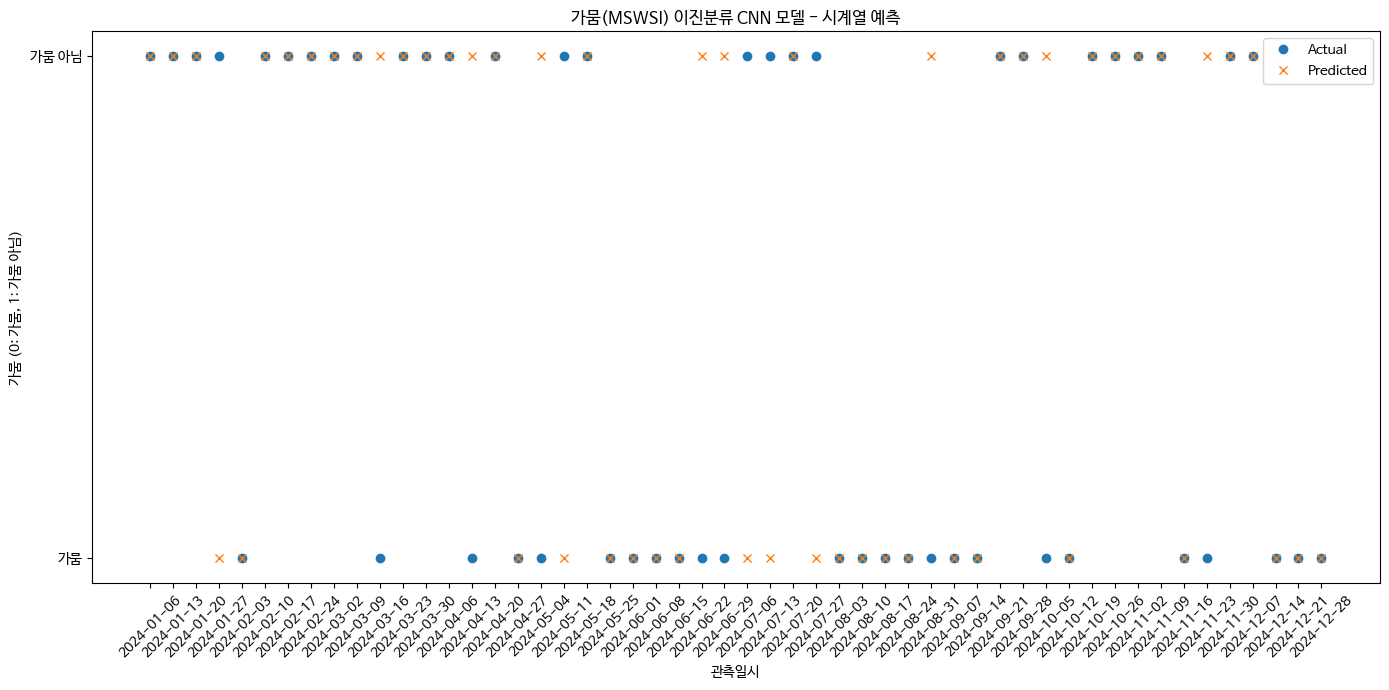

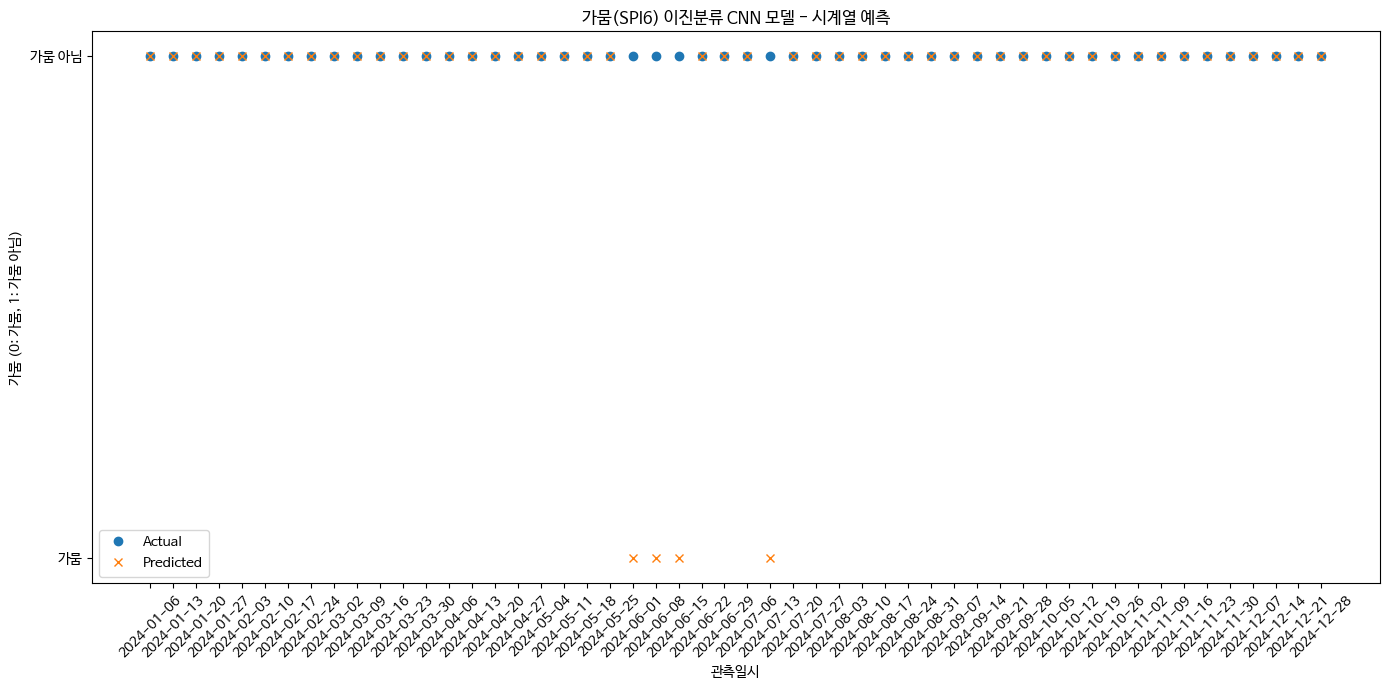

In [ ]:
# Prepare data for time series visualization for binary CNN models
# Get the predicted binary labels
y_pred_mswsi_binary = (model_mswsi_binary_cnn.predict(X_test_cnn) > 0.5).astype(int).flatten()
y_pred_spi6_binary = (model_spi6_binary_cnn.predict(X_test_cnn) > 0.5).astype(int).flatten()

# Create DataFrames for actual and predicted binary values with the correct index
y_test_binary_mswsi_df = y_test_binary_mswsi.to_frame()
y_test_binary_spi6_df = y_test_binary_spi6.to_frame()

y_pred_binary_mswsi_cnn_df = pd.DataFrame(y_pred_mswsi_binary, index=y_test.index, columns=['가뭄(MSWSI)'])
y_pred_binary_spi6_cnn_df = pd.DataFrame(y_pred_spi6_binary, index=y_test.index, columns=['가뭄(SPI6)'])

# Concatenate actual and predicted binary values for plotting
mswsi_binary_plot_df = pd.concat([y_test_binary_mswsi_df, y_pred_binary_mswsi_cnn_df], axis=1)
mswsi_binary_plot_df.columns = ['Actual', 'Predicted']

spi6_binary_plot_df = pd.concat([y_test_binary_spi6_df, y_pred_binary_spi6_cnn_df], axis=1)
spi6_binary_plot_df.columns = ['Actual', 'Predicted']

# Sort by index (date) to ensure correct time series plotting
mswsi_binary_plot_df = mswsi_binary_plot_df.sort_index()
spi6_binary_plot_df = spi6_binary_plot_df.sort_index()

# Visualize time series predictions for Binary 가뭄(MSWSI)
plt.figure(figsize=(14, 7))
plt.plot(mswsi_binary_plot_df.index, mswsi_binary_plot_df['Actual'], label='Actual', marker='o', linestyle='None')
plt.plot(mswsi_binary_plot_df.index, mswsi_binary_plot_df['Predicted'], label='Predicted', marker='x', linestyle='None')
plt.title('가뭄(MSWSI) 이진분류 CNN 모델 - 시계열 예측')
plt.xlabel('관측일시')
plt.ylabel('가뭄 (0: 가뭄, 1: 가뭄 아님)')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['가뭄', '가뭄 아님'])
plt.legend()
plt.tight_layout()
plt.show()

# Visualize time series predictions for Binary 가뭄(SPI6)
plt.figure(figsize=(14, 7))
plt.plot(spi6_binary_plot_df.index, spi6_binary_plot_df['Actual'], label='Actual', marker='o', linestyle='None')
plt.plot(spi6_binary_plot_df.index, spi6_binary_plot_df['Predicted'], label='Predicted', marker='x', linestyle='None')
plt.title('가뭄(SPI6) 이진분류 CNN 모델 - 시계열 예측')
plt.xlabel('관측일시')
plt.ylabel('가뭄 (0: 가뭄, 1: 가뭄 아님)')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['가뭄', '가뭄 아님'])
plt.legend()
plt.tight_layout()
plt.show()

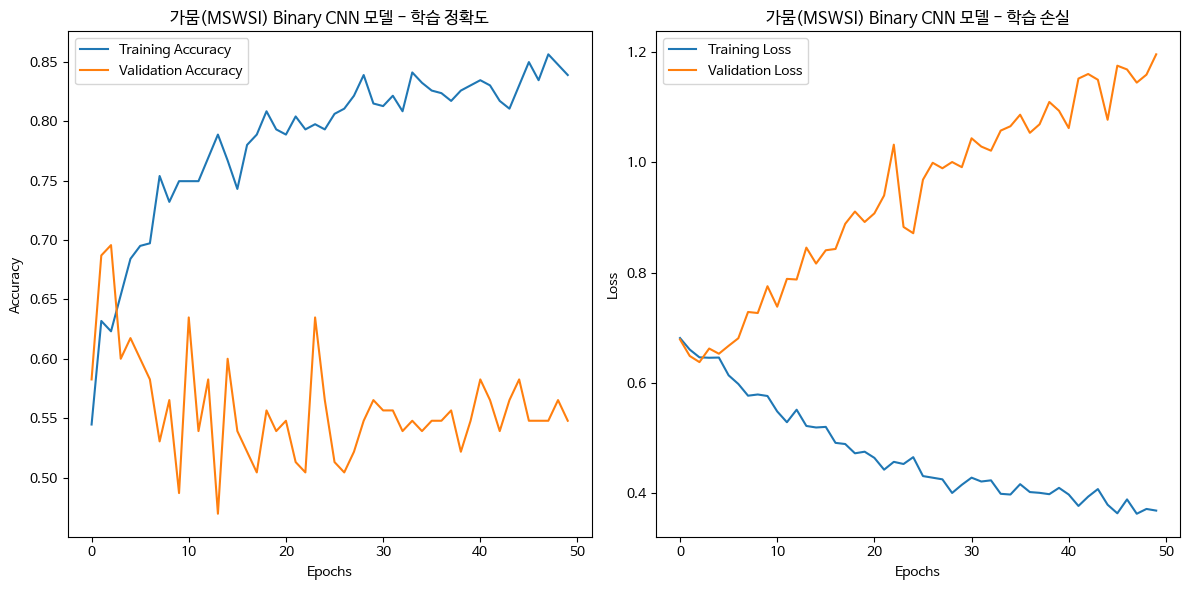

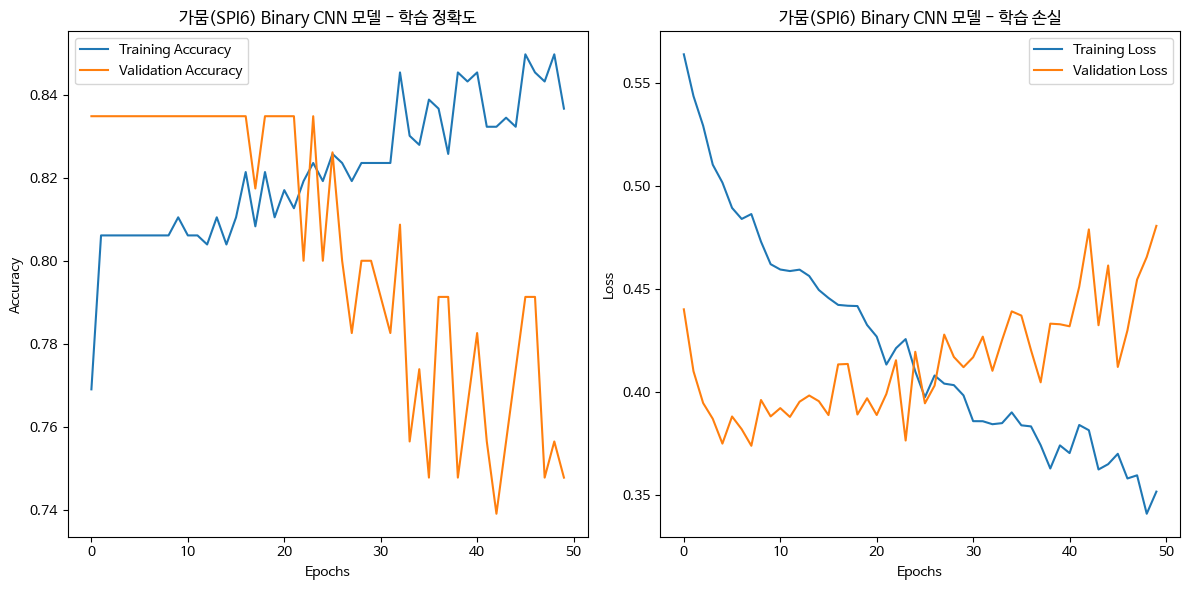

In [ ]:
# Plot training history for Binary 가뭄(MSWSI) CNN model
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_mswsi_binary_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_mswsi_binary_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('가뭄(MSWSI) Binary CNN 모델 - 학습 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mswsi_binary_cnn.history['loss'], label='Training Loss')
plt.plot(history_mswsi_binary_cnn.history['val_loss'], label='Validation Loss')
plt.title('가뭄(MSWSI) Binary CNN 모델 - 학습 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training history for Binary 가뭄(SPI6) CNN model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_spi6_binary_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_spi6_binary_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('가뭄(SPI6) Binary CNN 모델 - 학습 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_spi6_binary_cnn.history['loss'], label='Training Loss')
plt.plot(history_spi6_binary_cnn.history['val_loss'], label='Validation Loss')
plt.title('가뭄(SPI6) Binary CNN 모델 - 학습 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()